In [1]:
# In this project we will implement a Linear Regression model using Gradient Descent
# Objetive is to predict house prices based on various properties of the houses such as area, distance from city center etc.
# Lets import the libraries 

import numpy as np  # for numerical analysis
import matplotlib.pyplot as plt # for data-visulization

In [20]:
# Lets create a function to generate random example and have value for X and y

def generate_examples(num=1000):
    W = [1.0, -3.0]
    b = 1.0
    W = np.reshape(W, (2, 1))
    X = np.random.randn(num, 2)
    y = b + np.dot(X, W) + np.random.randn()     # adding noice using random.randn()
    y = np.reshape(y, (num, 1))
    return X, y

In [4]:
X, y = generate_examples()

In [5]:
print(X.shape, y.shape)

(1000, 2) (1000, 1)


In [6]:
print(X[0], y[0])

[ 0.52957796 -0.29259206] [2.32191973]


In [7]:
# Now lets try to find out values of W and b using gradient decent algorithm 
# We will start with random values for W and b and calculate y^ for those
# Then will compare the y^ (y predicted) with actual y 
# The objective of gradient descent is to minimised the loss value ( that simply means bring y^ close to y)

In [7]:
# Lets define the model to find the values of b and W
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()

In [8]:
model = Model(2)
print(model.W)
print(model.b)

[[0.37782297]
 [1.83943373]]
0.2281325274921831


In [22]:
# Forward-pass
# Gradient descent algorithm can be simplified in 4 steps
# 1. Get the value of y^ for X and random values of W and b
# 2. Compute the loss between y and y^ (MSE or RMSE)
# 3. Find the gradient of the loss wrt values of W and b
# 4. Update the values of W and b by substracting gradient value in previous step

In [9]:
# Lets extend the model-class to execute step-1 ie to calculate y_hat
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat

In [14]:
y_hat = Model(2).forward_pass(X)
print(y_hat.shape)

(1000, 1)


In [15]:
# Compute Loss (MSE)
class Model(Model):
    def compute_loss(self, y_hat, y):
        return np.sum(np.square(y_hat - y))/(2*y_hat.shape[0])

In [16]:
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)

In [17]:
print (loss)

3.520001092822291


Backword pass : Find the gradient of the loss wrt values of W and b

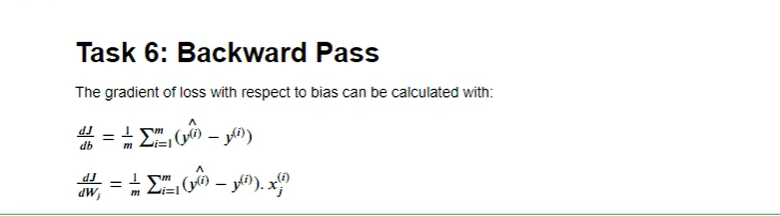

In [18]:
# Backward pass function
class Model(Model):
    def backword_pass (self, X, y, y_hat):
        m = y.shape[0]
        db = (1/m)*np.sum(y_hat - y)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat - y), X), axis=0)
        return dW, db

In [22]:
model = Model(2)
X, y = generate_examples()
y_hat = model.forward_pass(X)
dW, db = model.backword_pass(X, y, y_hat)

In [23]:
print(dW, db)

[-0.57568601  1.16064152] -0.2645734544824871


In [24]:
# Update Parameter
class Model(Model):
    def update_parameters(self, dW, db, lr):
        self.W = self.W - lr * np.reshape(dW, (self.num_features, 1))
        self.b = self.b - db

In [33]:
# Training-loop
class Model(Model):
    def train(self, X_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = model.forward_pass(X_train)
            loss = model.compute_loss(y_hat, y_train)
            dW, db = model.backword_pass(X_train, y_train, y_hat)
            self.update_parameters(dW, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses

In [36]:
model = Model(2)

In [37]:
X_train, y_train = generate_examples()

In [38]:
losses = model.train(X_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 9.8457
Iter: 100, Loss: 5.1629
Iter: 200, Loss: 2.7241
Iter: 300, Loss: 1.4374
Iter: 400, Loss: 0.7584
Iter: 500, Loss: 0.4002
Iter: 600, Loss: 0.2112
Iter: 700, Loss: 0.1114
Iter: 800, Loss: 0.0588
Iter: 900, Loss: 0.0310


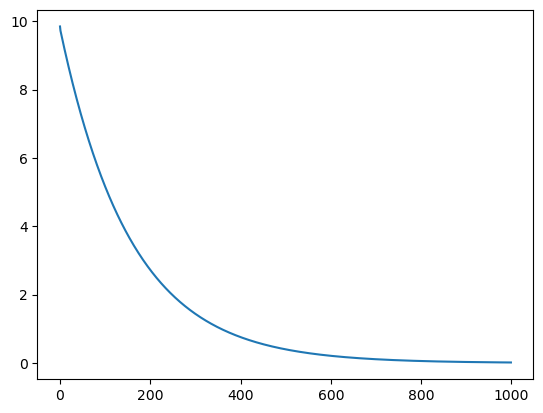

In [39]:
plt.plot(losses)

In [52]:
# Prediction from trained model

model_untrained = Model(2)
x_test, y_test = generate_examples(500)
print(x_test.shape, y_test.shape)

(500, 2) (500, 1)


In [53]:
prediction_untrained = model_untrained.forward_pass(x_test)
prediction_trained = model.forward_pass(x_test)

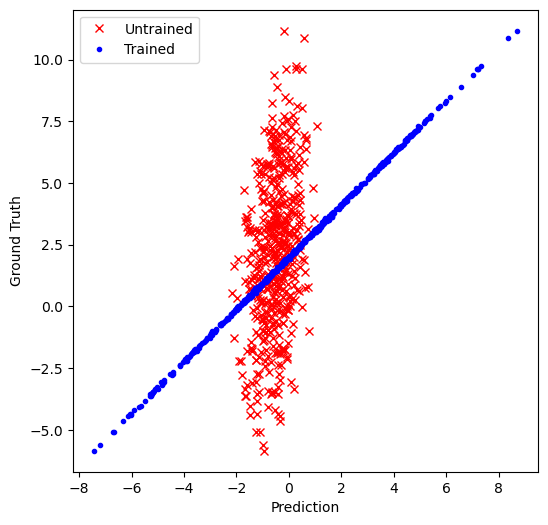

In [54]:
plt.figure(figsize = (6, 6))
plt.plot(prediction_untrained, y_test, 'rx', label = "Untrained")
plt.plot(prediction_trained, y_test, 'b.', label = "Trained")
plt.legend()
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show()